This notebook implements Ordinary Least Squares Linear Regression

https://mlu-explain.github.io/linear-regression/

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

In [12]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None # The coefficients or "weights"
        self.intercept_ = None # The intercept or "bias"
    
    def _mean_squared_error(self, y: np.array, y_pred: np.array):
        assert len(y) == len(y_pred)

        e = y - y_pred
        se = e ** 2
        return se.mean()
    
    def _gradient_descent(self, X: np.array, y: np.array):
        # Set initial values for weights and bias
        m, n = X.shape # M samples and N features
        coef = np.zeros(n) # Array of zero for each feature (one weight per feature)
        intercept = 0

        epochs = 1000
        learning_rate = 0.01
        # Iteratively update coef and intercept
        for i in range(epochs):
            # Calculate predictions and evaluate loss function
            y_pred = np.dot(X, coef) + intercept

            error = y - y_pred

            coef_gradient = -2/m * np.dot(X.T, error) # Gradient w.r.t. slope (num of samples)
            intercept_gradient = -2/m * np.sum(error) # Gradient w.r.t. intercept (bias)

            # Update weights and bias using learning rate
            coef -= learning_rate * coef_gradient
            intercept -= learning_rate * intercept_gradient
        return coef, intercept

    def fit(self, X: np.array, y: np.array):
        coef, intercept = self._gradient_descent(X=X, y=y)
        self.coef_ = coef
        self.intercept_ = intercept
        return
    
    def predict(self, X):
        return X @ self.coef_ + self.intercept_

In [17]:
df = pd.read_csv('https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz', sep='\t')
df

,sepal-length,sepal-width,petal-length,petal-width,target
0,6.7,3.0,5.2,2.3,2
1,6.0,2.2,5.0,1.5,2
2,6.2,2.8,4.8,1.8,2
3,7.7,3.8,6.7,2.2,2
4,7.2,3.0,5.8,1.6,2
...,...,...,...,...,...
145,5.0,3.5,1.6,0.6,0
146,5.4,3.9,1.7,0.4,0
147,5.1,3.4,1.5,0.2,0
148,5.0,3.6,1.4,0.2,0


In [33]:
X = df.drop('target', axis=1)
y = df['target']

In [34]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

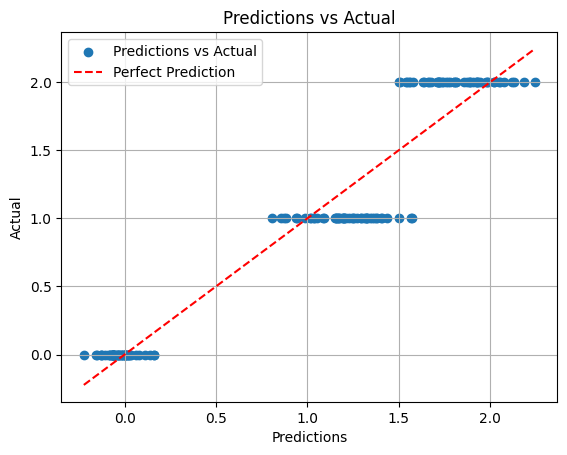

In [35]:
plt.scatter(y_pred, y, label="Predictions vs Actual")

min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title("Predictions vs Actual")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.legend()
plt.grid()
None

In [36]:
sk_lin_reg = sklearn.linear_model.LinearRegression()

model.fit(X, y)
sk_y_pred = model.predict(X)

In [38]:
sk_y_pred.equals(y_pred)

True